<IPython.core.display.Javascript object>


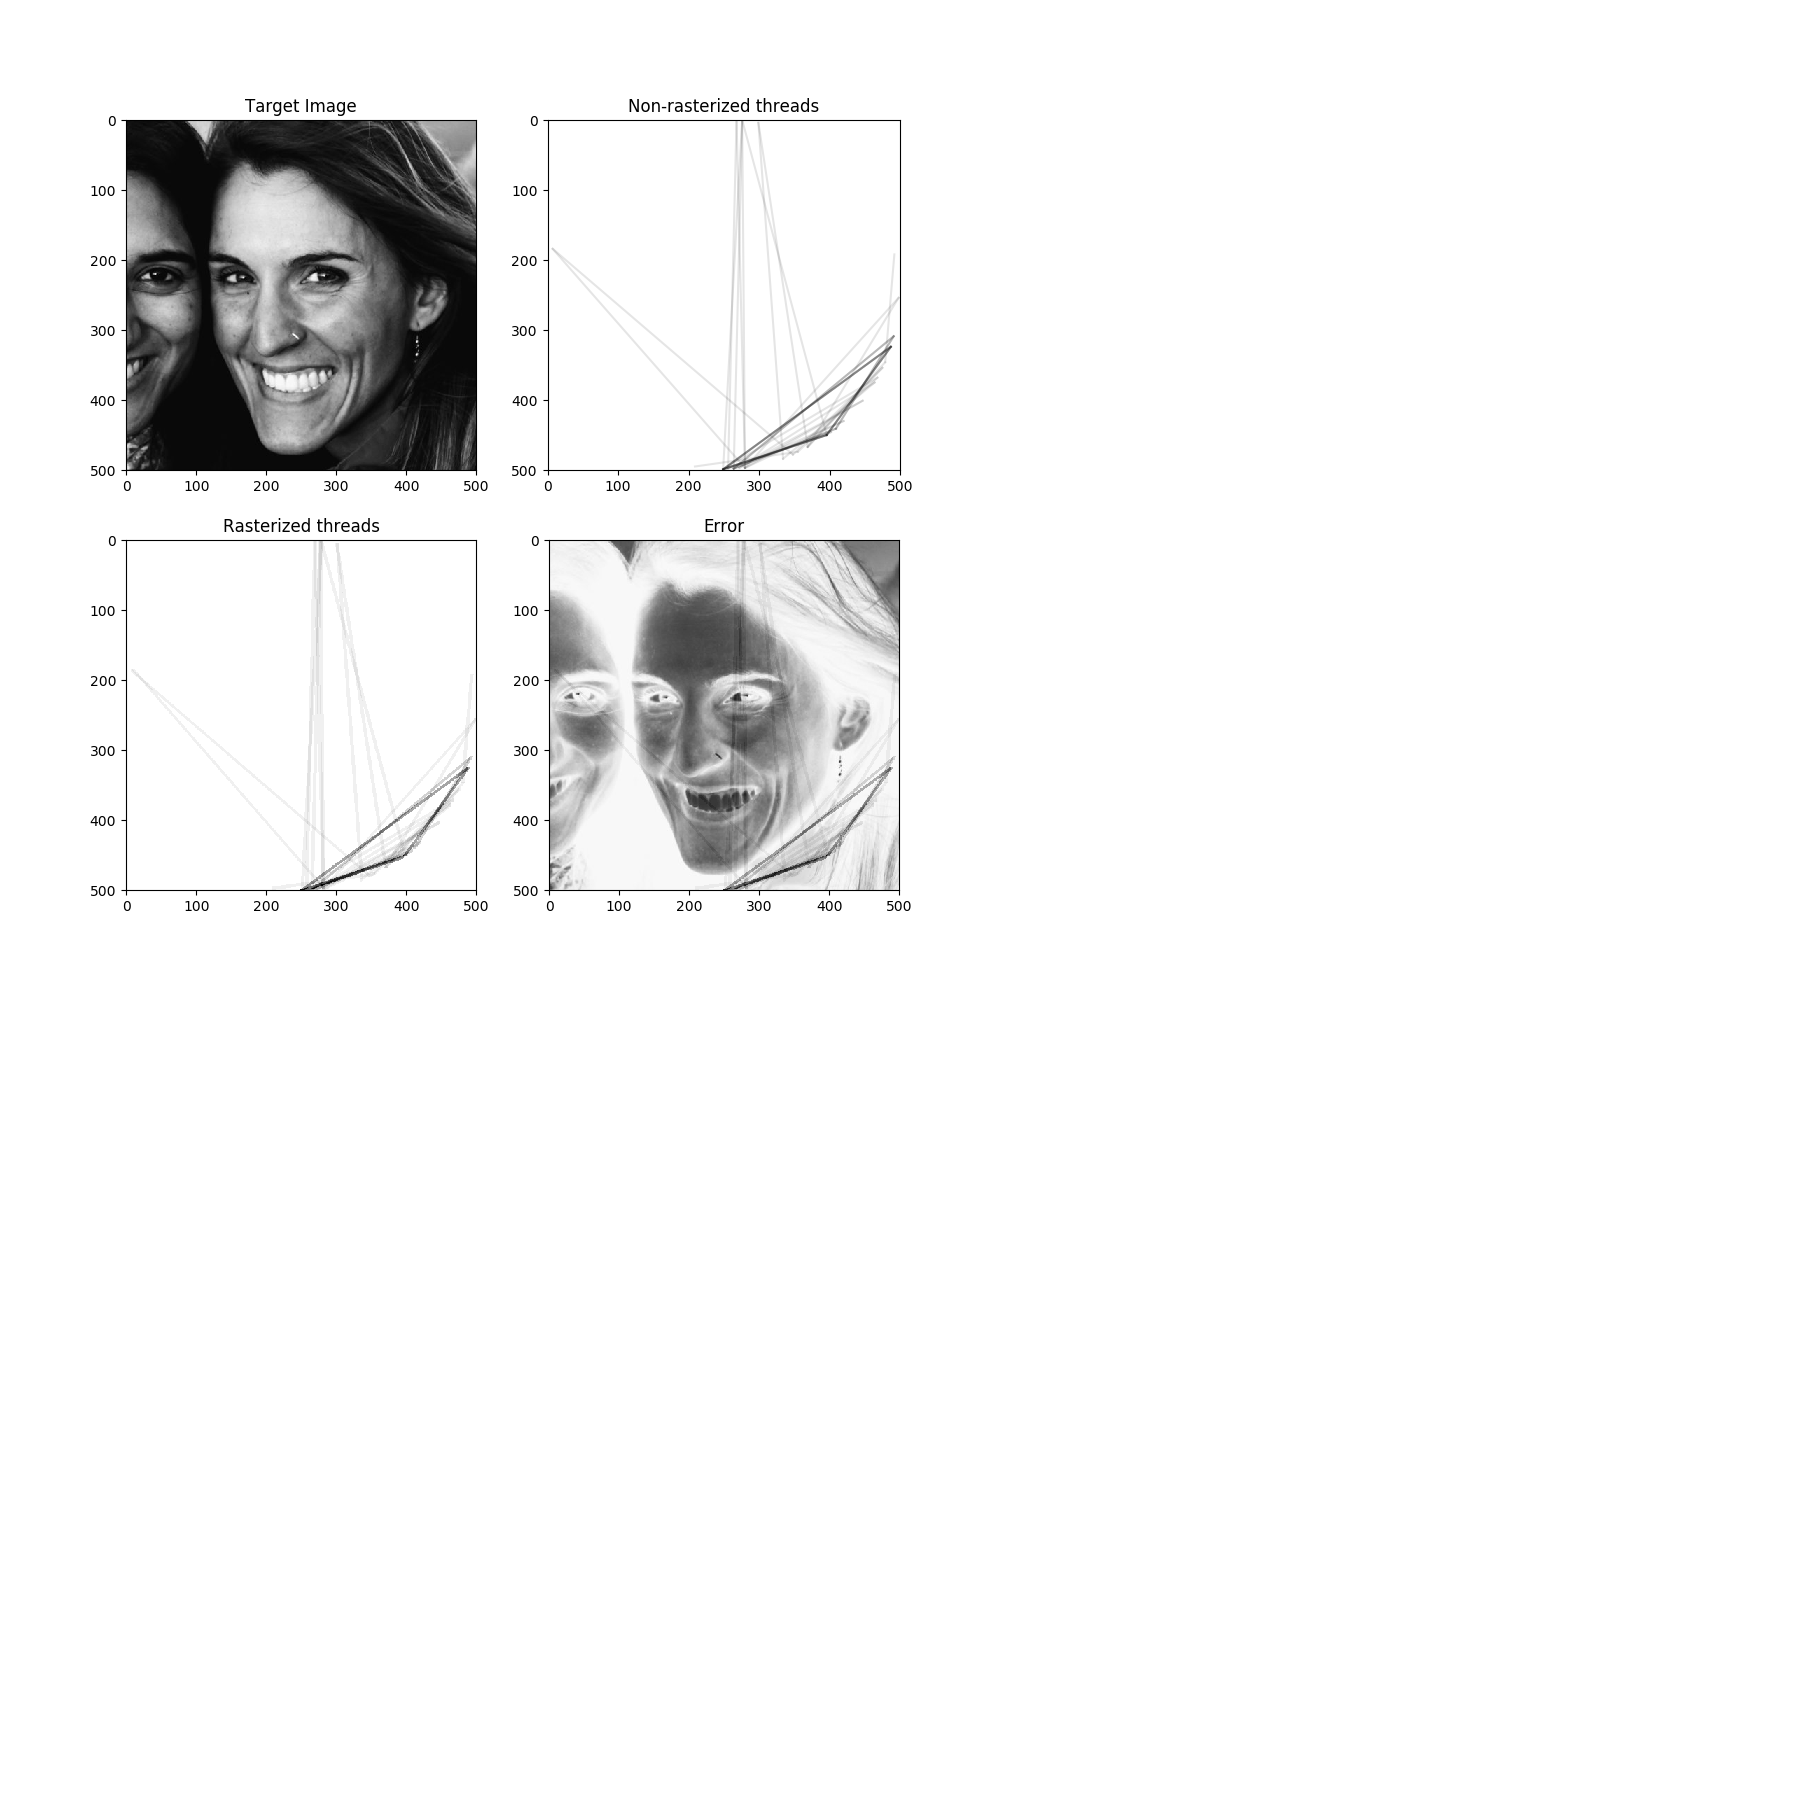

Starting with 194
14
34
0
20
40
0
20
40
0
20
40
0
20
40
0
20
40
0
20
40
0
20
96
0
21
1
97
4
24
2
22
42
2
22
42
2
22
42
2
96
4
29
3
33
11
93
16
36
13
141
4
49
16
37
57
19
39


In [ ]:
import matplotlib.image as mpimg
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
from bresenham import bresenham
from scipy import ndimage
from random import randint

%matplotlib nbagg

edge_size = 500
line_opacity = 15
thickness = 5
num_points = 200
padding = 20 

# Circle Points
theta = np.linspace(0, 2*np.pi, num_points)
a, b = edge_size * (np.cos(theta)+1)/2-1, edge_size * (np.sin(theta)+1)/2-1
points = zip([int(i) for i in a],[int(i) for i in b])

def get_image(f='./nerea1.jpg'):
    img = ndimage.imread(f, flatten=True)
    return img

class Plot():
    def __init__(self):
        self.fig = plt.figure(figsize=(10, 10))

        self.ax1 = self.fig.add_subplot(221)
        self.ax1.set_title("Target Image")
        self.ax2 = self.fig.add_subplot(222)
        self.ax2.set_title("Non-rasterized threads")
        self.ax2.set_xlim([0, edge_size])
        self.ax2.set_ylim([edge_size, 0])
        self.ax3 = self.fig.add_subplot(223)
        self.ax3.set_title("Rasterized threads")
        self.ax4 = self.fig.add_subplot(224)
        self.ax4.set_title("Error")
        #self.fig.subplots(figsize=(20, 10))
        #plt.tight_layout()

    def show(self, img, raster, diff, points_log):
        self.ax1.imshow(img, cmap="gray")
        #lc = LineCollection([points_log[-1]], linewidths=2, alpha=0.01)
        #self.ax2.add_collection(lc)
        line_x = [points[points_log[-2]][0], points[points_log[-1]][0]]
        line_y = [points[points_log[-2]][1], points[points_log[-1]][1]]
        self.ax2.plot(line_y, line_x, alpha=0.1, color="k")
        #self.ax2.plot(*zip(*points), 'b.')
        self.ax3.imshow(raster, cmap="gray")
        self.ax4.imshow(diff, cmap="gray")
        self.fig.canvas.draw()
        
        
def get_next_point(prev,diff):
    #i = randint(0, len(a)-1)
    best_score = -100
    starting_point =  points[prev[-1]]
    for i, proposed_point in enumerate(points):
        if (prev[-1]-i)%num_points < padding or (prev[-1]-i)%num_points > num_points - padding: continue        
        if (len(prev)>1 and prev[-2]==i): continue
        proposed_line = list(bresenham(starting_point[0], starting_point[1], proposed_point[0], proposed_point[1]))
        score = 0
        for point in proposed_line:
            if diff[point]<line_opacity:
                score = score + diff[point] - line_opacity
            else: 
                score = score + line_opacity
        if score/len(proposed_line)>best_score:
            best_i=i
            best_score = score / len(proposed_line)
    #print best_i
    return best_i

def draw_line(img,p1,p2):
    line_px = list(bresenham(p1[0], p1[1], p2[0], p2[1]))
    for px in line_px:
        if abs(p1[0]-p2[0])>abs(p1[1]-p2[1]):
            for j in xrange(thickness):
                if px[1]+j>=edge_size:
                    break
                img[px[0],px[1]+j] = max(img[px[0],px[1]+j] - line_opacity,0)
        else:
            for j in xrange(thickness):
                if px[0]+j>=edge_size:
                    break
                img[px[0]+j, px[1]] = max(img[px[0]+j, px[1]] - line_opacity,0)

def main():
    img = get_image()
    img = (img - img.min())/img.max()*255
    p = Plot()
    
    # Raster
    raster = np.zeros((edge_size, edge_size))+255
    diff = np.subtract(raster, img)
    i = 0
    points_log = [randint(0, len(points)-1)]
    print "Starting with {0}".format(points_log[0])
    while i<10000:
        next_point = get_next_point(points_log[-2:],diff)
        draw_line(raster,points[points_log[-1]],points[next_point])
        i = i+1
        points_log.append(next_point)
        diff = np.subtract(raster, img)
        p.show(img,raster,diff,points_log)
        #print i


if __name__ == "__main__":
    main()